In [1]:
from ultralytics import YOLO
import cv2
import os

In [2]:
base_path = '/home/rmahajani31/Projects/hubmap-hacking-the-human-vasculature'

In [3]:
model_path = f'./epoch5.pt'

In [4]:
model = YOLO(model_path)

In [5]:
def load_img(img_dir, img_id):
  img = cv2.imread(f"{img_dir}/{img_id}.png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def get_annotated_img(imgs_dir, annots_dir, base_img_id):
  eps = 1
  annotated_image_coco = load_img(imgs_dir, base_img_id)
  img_height, img_width, _ = annotated_image_coco.shape
  with open(f'{annots_dir}/{base_img_id}.pkl', 'rb') as f:
    tgt_annots = pickle.load(f)
  for tgt_annot in tgt_annots:
    coords = [[x, y] for x, y in zip(tgt_annot['segmentation'][0][::2], tgt_annot['segmentation'][0][1::2])]
    min_x, min_y, width, height = tgt_annot['bbox']
    cv2.fillPoly(annotated_image_coco, pts=[np.array(coords)], color=(0,255,0))
    top_left = (int(tgt_annot['bbox'][0]), int(tgt_annot['bbox'][1]))
    min_x = min(coords, key=lambda x: x[0])[0]
    min_y = min(coords, key=lambda x: x[1])[1]
    max_x = max(coords, key=lambda x: x[0])[0]
    max_y = max(coords, key=lambda x: x[1])[1]
    bottom_right = (int(tgt_annot['bbox'][0]+tgt_annot['bbox'][2]), int(tgt_annot['bbox'][1]+tgt_annot['bbox'][3]))
#     if min_x <= eps or max_x >= img_width-eps or min_y <= eps or max_y >= img_height-eps:
#       annotated_image_coco = cv2.rectangle(annotated_image_coco, top_left, bottom_right, (255,0,0), 2)
    annotated_image_coco = cv2.rectangle(annotated_image_coco, top_left, bottom_right, (255,0,0), 2)
  annotated_image_coco = add_border(annotated_image_coco, 5, (0,0,255))
  return annotated_image_coco
def add_border(image, border_size, border_color):
    height, width = image.shape[:2]
    new_height = height + 2 * border_size
    new_width = width + 2 * border_size
    bordered_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    bordered_image[border_size:height + border_size, border_size:width + border_size] = image
    cv2.rectangle(bordered_image, (0, 0), (new_width - 1, new_height - 1), border_color, border_size)
    return bordered_image

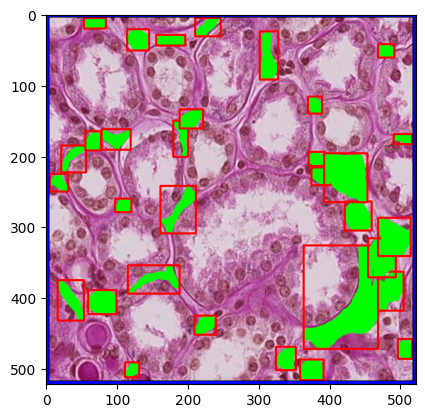


image 1/1 /home/rmahajani31/Projects/hubmap-hacking-the-human-vasculature/all_dataset_files/all_dataset_imgs/a2c83aa5cf1f.png: 512x512 9 blood vessels, 193.8ms
Speed: 3.7ms preprocess, 193.8ms inference, 9.8ms postprocess per image at shape (1, 3, 512, 512)


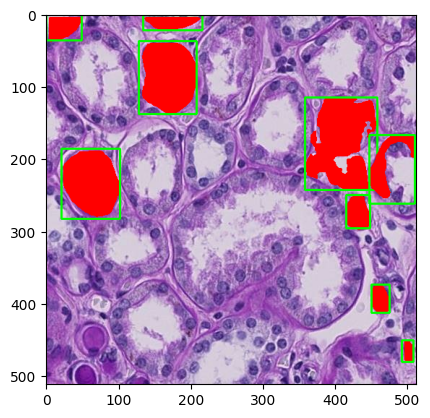

In [114]:
import pickle
dataset2_imgs = os.listdir(f'{base_path}/dataset1_files/all_dataset1_imgs')
i=5
tgt_img_id = dataset2_imgs[i].split('.png')[0]
orig_img = get_annotated_img(f'{base_path}/all_dataset_files/all_dataset_imgs', f'{base_path}/all_dataset_files/all_dataset_annotations', tgt_img_id)
# img_mask = cv2.imread(f'{base_path}/dataset1_files/all_dataset1_masks_merged_{train_mode}_{i}/{tgt_img_id}.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(orig_img)
plt.show()
results = model(f'{base_path}/all_dataset_files/all_dataset_imgs/{tgt_img_id}.png', conf=0.4)
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
im = cv2.imread(f'{base_path}/all_dataset_files/all_dataset_imgs/{tgt_img_id}.png')
for i in range(len(boxes)):
  conf = boxes[i].conf
  box_coords = boxes[i].xyxy[0].numpy().astype('int32')
  cv2.fillPoly(im, [masks[i].xy[0].astype('int32')], (255, 0, 0))
  cv2.rectangle(im, (box_coords[0], box_coords[1]), (box_coords[2], box_coords[3]), (0,255,0), thickness=2)
plt.imshow(im)
plt.show()

In [6]:
results = model('../train/7e75a9545fed.tif', conf=0.001)


image 1/1 /home/rmahajani31/Projects/hubmap-hacking-the-human-vasculature/project_yolo/../train/7e75a9545fed.tif: 512x512 300 blood vessels, 349.7ms
Speed: 4.8ms preprocess, 349.7ms inference, 318.1ms postprocess per image at shape (1, 3, 512, 512)


In [7]:
len(results)

1

In [9]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


torch.Size([1, 512, 512])
ultralytics.yolo.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
masks: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
orig_shape: (512, 512)
segments: [array([[    0.85547,     0.48438],
       [    0.85156,     0.48828],
       [    0.85156,     0.51953],
       [    0.85352,     0.52148],
       [    0.85547,     0.52148],
       [    0.85742,     0.52344],
       [    0.85938,     0.52344],
       [    0.86133,     0.52539],
       [    0.86523,     0.52539],
       [    0.86719,     

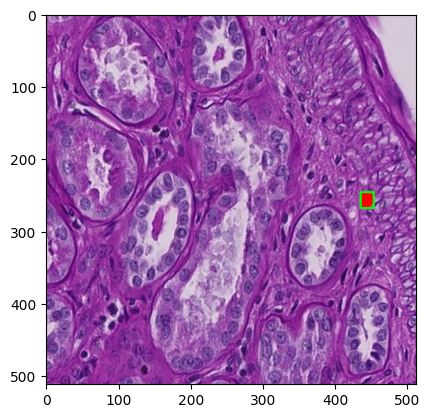

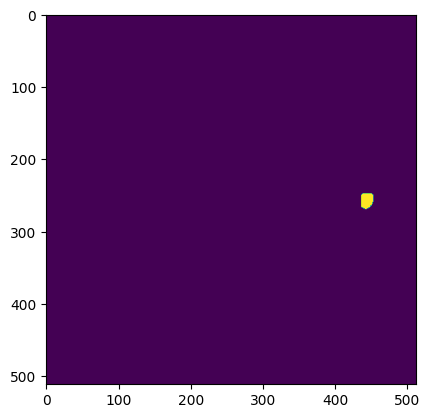

In [17]:
import matplotlib.pyplot as plt
import numpy as np
im = cv2.imread('../train/7e75a9545fed.tif')
i = 3
# print(masks[0].xy[0])
conf = boxes[i].conf
print(masks[i].data.shape)
box_coords = boxes[i].xyxy[0].numpy().astype('int32')
cv2.fillPoly(im, [masks[i].xy[0].astype('int32')], (255, 0, 0))
cv2.rectangle(im, (box_coords[0], box_coords[1]), (box_coords[2], box_coords[3]), (0,255,0), thickness=2)
print(masks[i])
print(f'Confidence: {conf}')
print(np.unique(masks[i].data.squeeze().numpy()))
plt.imshow(im)
plt.show()
plt.imshow(masks[i].data.squeeze().numpy())
plt.show()